In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf
import yfinance
import ta

In [23]:
eur_df = yfinance.Ticker('EURUSD=X').history(period='5y')[['Open', 'High', 'Low', 'Close']]
jpy_df = yfinance.Ticker('JPYUSD=X').history(period='5y')[['Open', 'High', 'Low', 'Close']]
gbp_df = yfinance.Ticker('GBPUSD=X').history(period='5y')[['Open', 'High', 'Low', 'Close']]
cny_df = yfinance.Ticker('CNYUSD=X').history(period='5y')[['Open', 'High', 'Low', 'Close']]

In [24]:
df = eur_df.copy()
df = df.ffill()
df['return'] = df['Close'].shift(-1) - df['Close']
df

,Open,High,Low,Close,return
Date,,,,,
2015-12-04,1.091834,1.095194,1.085800,1.091596,-0.003196
2015-12-07,1.088305,1.088305,1.079800,1.088400,-0.005000
2015-12-08,1.083600,1.090000,1.083142,1.083400,0.005996
2015-12-09,1.089503,1.099000,1.088198,1.089396,0.012399
2015-12-10,1.101698,1.102305,1.092799,1.101795,-0.006984
...,...,...,...,...,...
2020-11-30,1.197074,1.200206,1.194415,1.197146,-0.003330
2020-12-01,1.193773,1.205357,1.193599,1.193816,0.013622
2020-12-02,1.206986,1.210742,1.204079,1.207438,0.004022


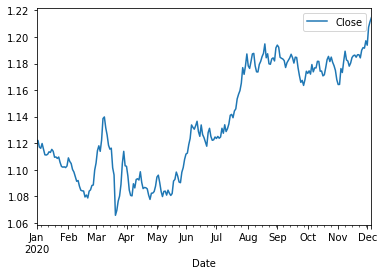

In [25]:
df.loc['2020-01-01':].plot(y='Close')

In [26]:
df['next_close'] = df['Close'].shift(-1)
df.tail()

,Open,High,Low,Close,return,next_close
Date,,,,,,
2020-11-30,1.197074,1.200206,1.194415,1.197146,-0.003330,1.193816
2020-12-01,1.193773,1.205357,1.193599,1.193816,0.013622,1.207438
2020-12-02,1.206986,1.210742,1.204079,1.207438,0.004022,1.211460
2020-12-03,1.211343,1.217500,1.210243,1.211460,0.003105,1.214565
2020-12-04,1.214535,1.217775,1.213371,1.214565,NaN,NaN


In [27]:
df.dropna(inplace=True)

In [28]:
train_df = df.loc[: '2020-04-01']
test_df = df.loc['2020-04-01':]

X_train = train_df[['Open', 'High', 'Low', 'Close']]
Y_train = train_df['next_close']

X_test = test_df[['Open', 'High', 'Low', 'Close']]
Y_test = test_df['next_close']

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [31]:
pd.Series(linear_regressor.coef_, index=['Open', 'High', 'Low', 'Close'])

Open    -0.600677
High     0.758295
Low      0.839411
Close   -0.000774
dtype: float64

In [32]:
test_df['prediction'] = linear_regressor.predict(X_test)

<ipython-input-32-f2e54105d0f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['prediction'] = linear_regressor.predict(X_test)


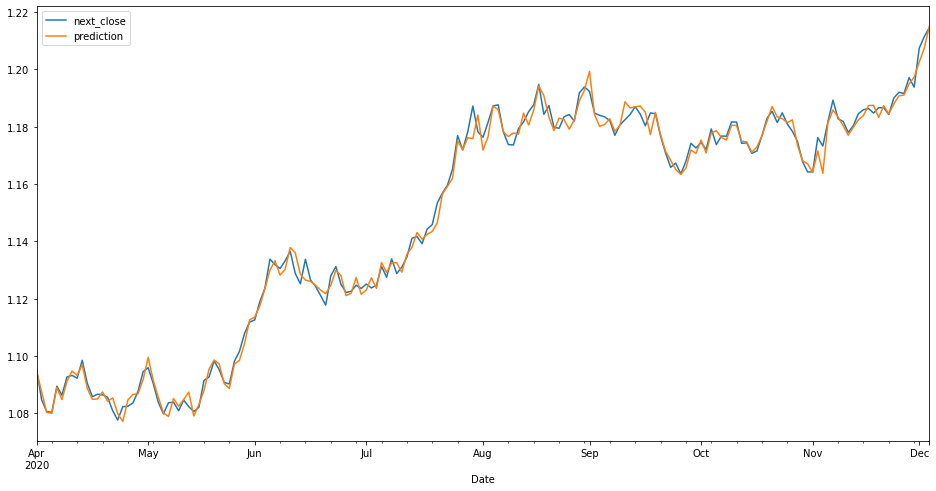

In [33]:
test_df.plot(y=['next_close', 'prediction'], figsize=(16, 8))

In [34]:
test_df

,Open,High,Low,Close,return,next_close,prediction
Date,,,,,,,
2020-04-01,1.102816,1.103753,1.091870,1.102657,-0.007295,1.095362,1.094769
2020-04-02,1.095098,1.096299,1.084434,1.095362,-0.010622,1.084740,1.087516
2020-04-03,1.084387,1.085894,1.077620,1.084740,-0.004044,1.080696,1.080349
2020-04-06,1.080824,1.083435,1.076925,1.080696,-0.000315,1.080380,1.080044
2020-04-07,1.080194,1.092335,1.079140,1.080380,0.009134,1.089514,1.089031
...,...,...,...,...,...,...,...
2020-11-27,1.191185,1.196187,1.191072,1.191600,0.005546,1.197146,1.194982
2020-11-30,1.197074,1.200206,1.194415,1.197146,-0.003330,1.193816,1.197294
2020-12-01,1.193773,1.205357,1.193599,1.193816,0.013622,1.207438,1.202501


In [35]:
test_df['action'] = test_df['prediction'] > test_df['Close']

<ipython-input-35-2b765a4bc9ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['action'] = test_df['prediction'] > test_df['Close']


<ipython-input-36-2a26b8700529>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['margin'] = test_df['return']*test_df['action']


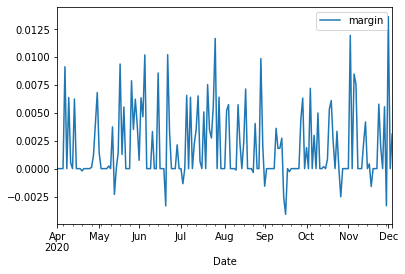

In [36]:
test_df['margin'] = test_df['return']*test_df['action']
test_df.plot(y='margin')


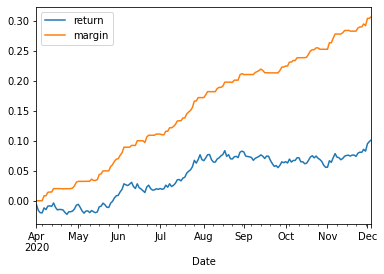

In [39]:
result = test_df[['return', 'margin']]
result = result / test_df['Close'].values[0]


result.cumsum().plot()

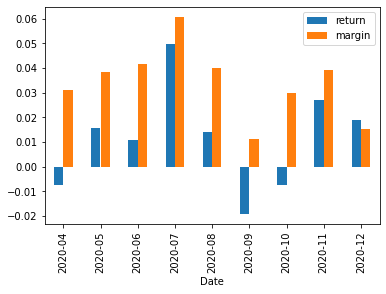

In [43]:
result.resample('M', kind='period').sum().plot(kind='bar')